# Partie I: Prétraitement des données.

## Lecture des bases de données en format CSV.


In [5]:
#Python library

# Classic,data manipulation and linear algebra

import pandas as pd
import numpy as np

#Importation data
import os
import glob
from pandas import set_option

#Graphical tools
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
%matplotlib inline

#Statistiques
import statsmodels.api as sm
from scipy.stats import chi2_contingency
import scipy.stats as stats

#Data imputing/preprocessing

# To use the experimental IterativeImputer, we need to explicitly ask for it:
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures,PowerTransformer,QuantileTransformer
from sklearn.cluster import KMeans


# Classifiers
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import QuantileRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import ElasticNet, PassiveAggressiveRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

# Metrics and ML processing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error,make_scorer,r2_score, mean_absolute_error,mean_pinball_loss
#from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from datetime import datetime
#import missingno as msno

#warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', '.*do not.*', )
warnings.warn('Do not show this message')
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

sns.set(rc={'figure.figsize':(6, 4)})
sns.set_theme(context="notebook", style="white", palette="pastel",font_scale=0.9)

# Pour la reproductibilité des résultats
#rs=np.random.seed(42)
rs=42
#import pandas_profiling as pp

## Partie I: Prétraitement des données.

### Chargement des données

In [6]:
def load_db():
    salaire_employe_CNP = pd.read_csv(r"D:\Daiana\Documents\AEC Intelligence artificielle\7_A57_Mise en place d'un écosystème d'IA\salary\data\processed\salaire_employe_CNP",sep=",")
    return salaire_employe_CNP

In [7]:
salaire_employe_CNP=load_db()

In [8]:
print("Les dimensions jeu de données salaire:",salaire_employe_CNP.shape)


Les dimensions jeu de données salaire: (84135, 15)


In [37]:
salaire_employe_CNP.tail()

Annee                Regions                    CNP    Sexe  \
84130   2021  Île-du-Prince-Édouard  Vente et services [6]  Hommes   
84131   2021  Île-du-Prince-Édouard  Vente et services [6]  Hommes   
84132   2021  Île-du-Prince-Édouard  Vente et services [6]  Hommes   
84133   2021  Île-du-Prince-Édouard  Vente et services [6]  Hommes   
84134   2021  Île-du-Prince-Édouard  Vente et services [6]  Hommes   

         Groupe d'âge                                   Genre de travail  \
84130     25 à 54 ans                             Employés à temps plein   
84131     25 à 54 ans  Ensemble des employés à temps plein et à temps...   
84132  55 ans et plus                           Employés à temps partiel   
84133  55 ans et plus                             Employés à temps plein   
84134  55 ans et plus  Ensemble des employés à temps plein et à temps...   

       Ratio_salaire_hebdo_moyen  Ratio_salaire_hebdo_median  \
84130                        0.0                         0.0   
84131                        0.0                         0.0   
84132                        0.0                         0.0   
84133                        0.0                         0.0   
84134                        0.0                         0.0   

       Ratio_salaire_horaire_moyen  Ratio_salaire_horaire_median  \
84130                          0.0                           0.0   
84131                          0.0                           0.0   
84132                          0.0                           0.0   
84133                          0.0                           0.0   
84134                          0.0                           0.0   

       Salaire hebdomadaire moyen  Salaire hebdomadaire médian  \
84130                      746.94                       678.30   
84131                      678.74                       630.00   
84132                      294.03                       292.50   
84133                      807.50                       742.88   
84134                      736.54                       700.63   

       Salaire horaire moyen  Salaire horaire médian  \
84130                  18.61                   17.96   
84131                  18.09                   16.50   
84132                  15.44                   15.00   
84133                  20.05                   19.50   
84134                  19.41                   18.64   

       Total des employés, tous les salaires  
84130                                    2.8  
84131                                    3.3  
84132                                    0.2  
84133                                    1.3  
84134                                    1.5

In [10]:
salaire_employe_CNP.columns

Index(['Annee', 'Regions', 'CNP', 'Sexe', 'Groupe d'âge', 'Genre de travail',
       'Ratio_salaire_hebdo_moyen', 'Ratio_salaire_hebdo_median',
       'Ratio_salaire_horaire_moyen', 'Ratio_salaire_horaire_median',
       'Salaire hebdomadaire moyen', 'Salaire hebdomadaire médian',
       'Salaire horaire moyen', 'Salaire horaire médian',
       'Total des employés, tous les salaires'],
      dtype='object')

In [60]:
salaire_employe=salaire_employe_CNP[['Annee', 'Regions', 'CNP',"Groupe d'âge", "Genre de travail",'Salaire horaire moyen']].copy() # 'Sexe',

### Séparation des variables X et de la réponse y de la base de données.

In [61]:
# Caractéristiques mesurées
X = salaire_employe.drop(['Salaire horaire moyen'], axis=1)

# Réponse binaire
y = salaire_employe["Salaire horaire moyen"]

# Liste des variables utilisées
feature_list = list(X.columns)

### Séparation des données en ensembles d'entrainement (80%) et de test (20 %).

Séparer le jeux des données en un ensemble d'entrainement (qui va servir à entrainer un algorithme de regression) et un ensemble de test (qui va permettre d'en mesurer les performances sur des données jamais rencontrées).


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [63]:
y_train_=pd.DataFrame(y_train,columns=["Salaire horaire moyen"])
y_test_=pd.DataFrame(y_test,columns=["Salaire horaire moyen"])

In [64]:
X_train

Annee               Regions  \
15219   2002  Colombie-Britannique   
15686   2002              Manitoba   
46466   2011               Ontario   
7372    1999               Ontario   
64709   2016                Québec   
...      ...                   ...   
6265    1999  Colombie-Britannique   
54886   2014               Alberta   
76820   2020               Alberta   
860     1997              Manitoba   
15795   2002     Nouveau-Brunswick   

                                                     CNP    Groupe d'âge  \
15219  Personnel de supervision en services et person...     25 à 54 ans   
15686                            Secteur de la santé [3]     25 à 54 ans   
46466  Personnel professionnel des sciences naturelle...     15 à 24 ans   
7372   Personnel de soutien en service et autre perso...     15 à 24 ans   
64709  Personnel professionnel des sciences naturelle...     15 à 24 ans   
...                                                  ...             ...   
6265    Personnel professionnel en soins infirmiers [30]     25 à 54 ans   
54886            Affaires, finance et administration [1]  55 ans et plus   
76820  Enseignement, droit et services sociaux, commu...  55 ans et plus   
860           Total des employés, toutes les professions     15 à 24 ans   
15795                Personnel de soutien de bureau [14]     25 à 54 ans   

                                        Genre de travail  
15219  Ensemble des employés à temps plein et à temps...  
15686                             Employés à temps plein  
46466                             Employés à temps plein  
7372   Ensemble des employés à temps plein et à temps...  
64709  Ensemble des employés à temps plein et à temps...  
...                                                  ...  
6265   Ensemble des employés à temps plein et à temps...  
54886  Ensemble des employés à temps plein et à temps...  
76820                             Employés à temps plein  
860                               Employés à temps plein  
15795  Ensemble des employés à temps plein et à temps...  

[67308 rows x 5 columns]

### Transformation des données

La variable **Salaire horaire moyen** est asymétrique à droite. 
On utilise la transformation logarithmique pour obtenir une distribution normale.

In [65]:
def log_transform(data,col):
    for column in col:
        if (data[column]==1.0).all():
            data[column+"_log"]=np.log(data[column]+1)
        else:
            data[column+"_log"]=np.log(data[column]+1)
    data.info()       

In [66]:
log_transform(y_train_,["Salaire horaire moyen"])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 67308 entries, 15219 to 15795
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Salaire horaire moyen      67308 non-null  float64
 1   Salaire horaire moyen_log  67308 non-null  float64
dtypes: float64(2)
memory usage: 1.5 MB


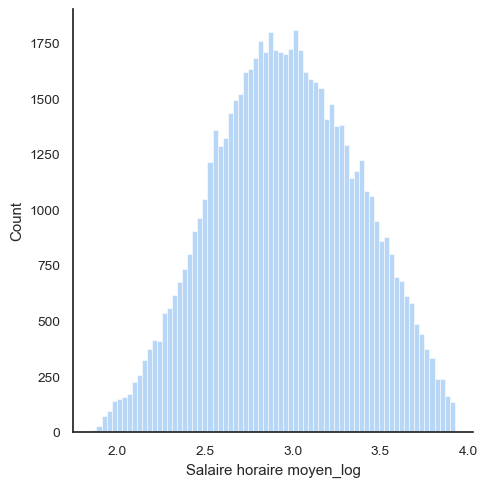

In [43]:
sns.displot(y_train_["Salaire horaire moyen_log"])
plt.show()

In [67]:
y_train_.describe()

Salaire horaire moyen  Salaire horaire moyen_log
count           67308.000000               67308.000000
mean               20.032748                   2.963136
std                 8.693708                   0.409302
min                 5.390000                   1.854734
25%                13.430000                   2.669309
50%                18.260000                   2.958030
75%                25.090000                   3.261552
max                49.520000                   3.922369

In [68]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # histogramme
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('histogramme')

    # Q-Q 
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\daian\AppData\Local\Temp\ipykernel_13240\2179639837.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




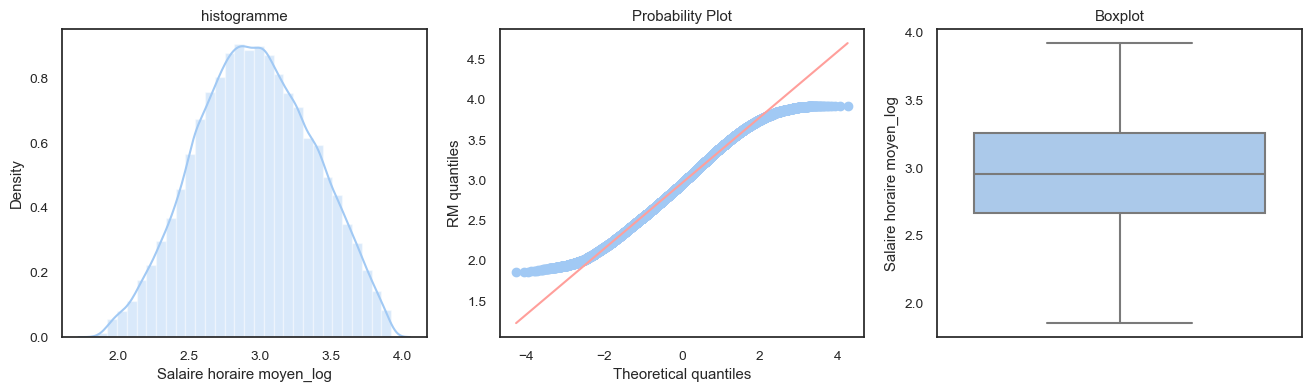

In [69]:
diagnostic_plots(y_train_,"Salaire horaire moyen_log")

In [70]:
from scipy.stats import jarque_bera

print(jarque_bera(y_train_["Salaire horaire moyen_log"]))

Jarque_beraResult(statistic=871.5971349870844, pvalue=0.0)


La variable *Salaire horaire moyen_log* ne suit pas une lois normale, mais elle s'approche plus que la variable salaire horaire moyen

### Encodage des variable catégorielle

In [72]:
def encode_df(df):
    df_encode=df.copy()
    df_encode= pd.get_dummies(df_encode, columns=["Genre de travail", 'Regions', 'CNP', "Groupe d'âge"],drop_first=True)# 'Sexe',
    return df_encode



In [73]:
x_train=encode_df(X_train)
x_test=encode_df(X_test)

In [74]:
y_train_log=np.log(y_train)
y_test_log=np.log(y_test)

In [75]:
x_train

Annee  Genre de travail_Employés à temps plein  \
15219   2002                                        0   
15686   2002                                        1   
46466   2011                                        1   
7372    1999                                        0   
64709   2016                                        0   
...      ...                                      ...   
6265    1999                                        0   
54886   2014                                        0   
76820   2020                                        1   
860     1997                                        1   
15795   2002                                        0   

       Genre de travail_Ensemble des employés à temps plein et à temps partiel  \
15219                                                  1                         
15686                                                  0                         
46466                                                  0                         
7372                                                   1                         
64709                                                  1                         
...                                                  ...                         
6265                                                   1                         
54886                                                  1                         
76820                                                  0                         
860                                                    0                         
15795                                                  1                         

       Regions_Colombie-Britannique  Regions_Manitoba  \
15219                             1                 0   
15686                             0                 1   
46466                             0                 0   
7372                              0                 0   
64709                             0                 0   
...                             ...               ...   
6265                              1                 0   
54886                             0                 0   
76820                             0                 0   
860                               0                 1   
15795                             0                 0   

       Regions_Nouveau-Brunswick  Regions_Nouvelle-Écosse  Regions_Ontario  \
15219                          0                        0                0   
15686                          0                        0                0   
46466                          0                        0                1   
7372                           0                        0                1   
64709                          0                        0                0   
...                          ...                      ...              ...   
6265                           0                        0                0   
54886                          0                        0                0   
76820                          0                        0                0   
860                            0                        0                0   
15795                          1                        0                0   

       Regions_Québec  Regions_Saskatchewan  ...  \
15219               0                     0  ...   
15686               0                     0  ...   
46466               0                     0  ...   
7372                0                     0  ...   
64709               1                     0  ...   
...               ...                   ...  ...   
6265                0                     0  ...   
54886               0                     0  ...   
76820               0                     0  ...   
860                 0                     0  ...   
15795               0                     0  ...   

       CNP_Représentants/représentantes de services et autre personnel de services à la cl

## Partie II: Entrainement d'un classifieur.

On va utiliser  six(6)modèles de regression differents et nous allons vérifier lequel va bien fonctionner.

 * Linear Regression, 
 * Decision Tree Regression, 
 * Random Forest Regression, 
 * Gradient Boosting Machine Regression, 
 * Light Gradient Boosting Machine Regression,
 * Xtreme Gradient Boosting Machine Regression, 
 * Cat Boost Regression

### Modèles de regression

In [76]:
from sklearn.preprocessing import PolynomialFeatures
# Train all 7 models on x_train and y_train
lrmodel=LinearRegression().fit(x_train,y_train_log)
dt_model = DecisionTreeRegressor().fit(x_train,y_train_log)
rf_model=RandomForestRegressor().fit(x_train,y_train_log)
gbm_model=GradientBoostingRegressor().fit(x_train,y_train_log)



In [77]:
# define function to evaluate all these 7 models
def evaluate_model(model,x_test,y_test):
    prediction=model.predict(x_test)
    print("Mean Absolute Error:",mean_absolute_error(y_test,prediction))
   # print("Mean Absolute Percentage Error:",mean_absolute_percentage_error(y_test,prediction))
    print("Mean Squared Error:",mean_squared_error(y_test,prediction))
    print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,prediction)))
    print("R2 Score:",r2_score(y_test,prediction))

In [78]:
# Lets evaluate these 7 models and see the results
print("LR_Model:")
print(evaluate_model(lrmodel,x_test,y_test_log))
print()
print("DT_Model:")
print(evaluate_model(dt_model,x_test,y_test_log))
print()
print("RF_Model:")
print(evaluate_model(rf_model,x_test,y_test_log))
print()
print("GBM_Model:")
print(evaluate_model(gbm_model,x_test,y_test_log))
print()


LR_Model:
Mean Absolute Error: 0.11027180412067122
Mean Squared Error: 0.01938674561534468
Root Mean Squared Error: 0.13923629417412933
R2 Score: 0.897936432355237
None

DT_Model:
Mean Absolute Error: 0.14415007768685706
Mean Squared Error: 0.03545375696237419
Root Mean Squared Error: 0.18829168054477124
R2 Score: 0.8133499560067379
None

RF_Model:
Mean Absolute Error: 0.12004619673882244
Mean Squared Error: 0.024298498923105857
Root Mean Squared Error: 0.15587975790045946
R2 Score: 0.8720779888636031
None

GBM_Model:
Mean Absolute Error: 0.14172931602222597
Mean Squared Error: 0.03122381428661457
Root Mean Squared Error: 0.17670261539268334
R2 Score: 0.8356189354933801
None



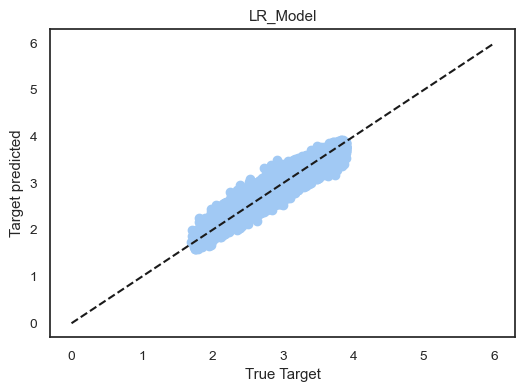

In [67]:
f, (ax0) = plt.subplots(1, 1, sharey=True)
ax0.scatter(y_test_log, lrmodel.predict(x_test))
ax0.plot([0, 6], [0, 6], "--k")
ax0.set_ylabel("Target predicted")
ax0.set_xlabel("True Target")
plt.title('LR_Model')
plt.show()

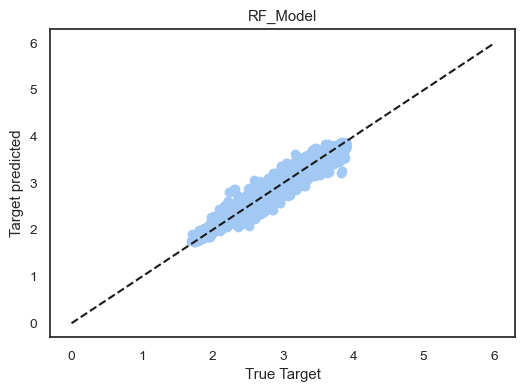

In [68]:
f, (ax0) = plt.subplots(1, 1, sharey=True)
ax0.scatter(y_test_log, rf_model.predict(x_test))
ax0.plot([0, 6], [0, 6], "--k")
ax0.set_ylabel("Target predicted")
ax0.set_xlabel("True Target")
plt.title('RF_Model')
plt.show()

### Feature importance

In [93]:

def plot_importance(model, features, num=len(x_train), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()


C:\Users\daian\AppData\Local\Temp\ipykernel_16908\3826766625.py:8: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.



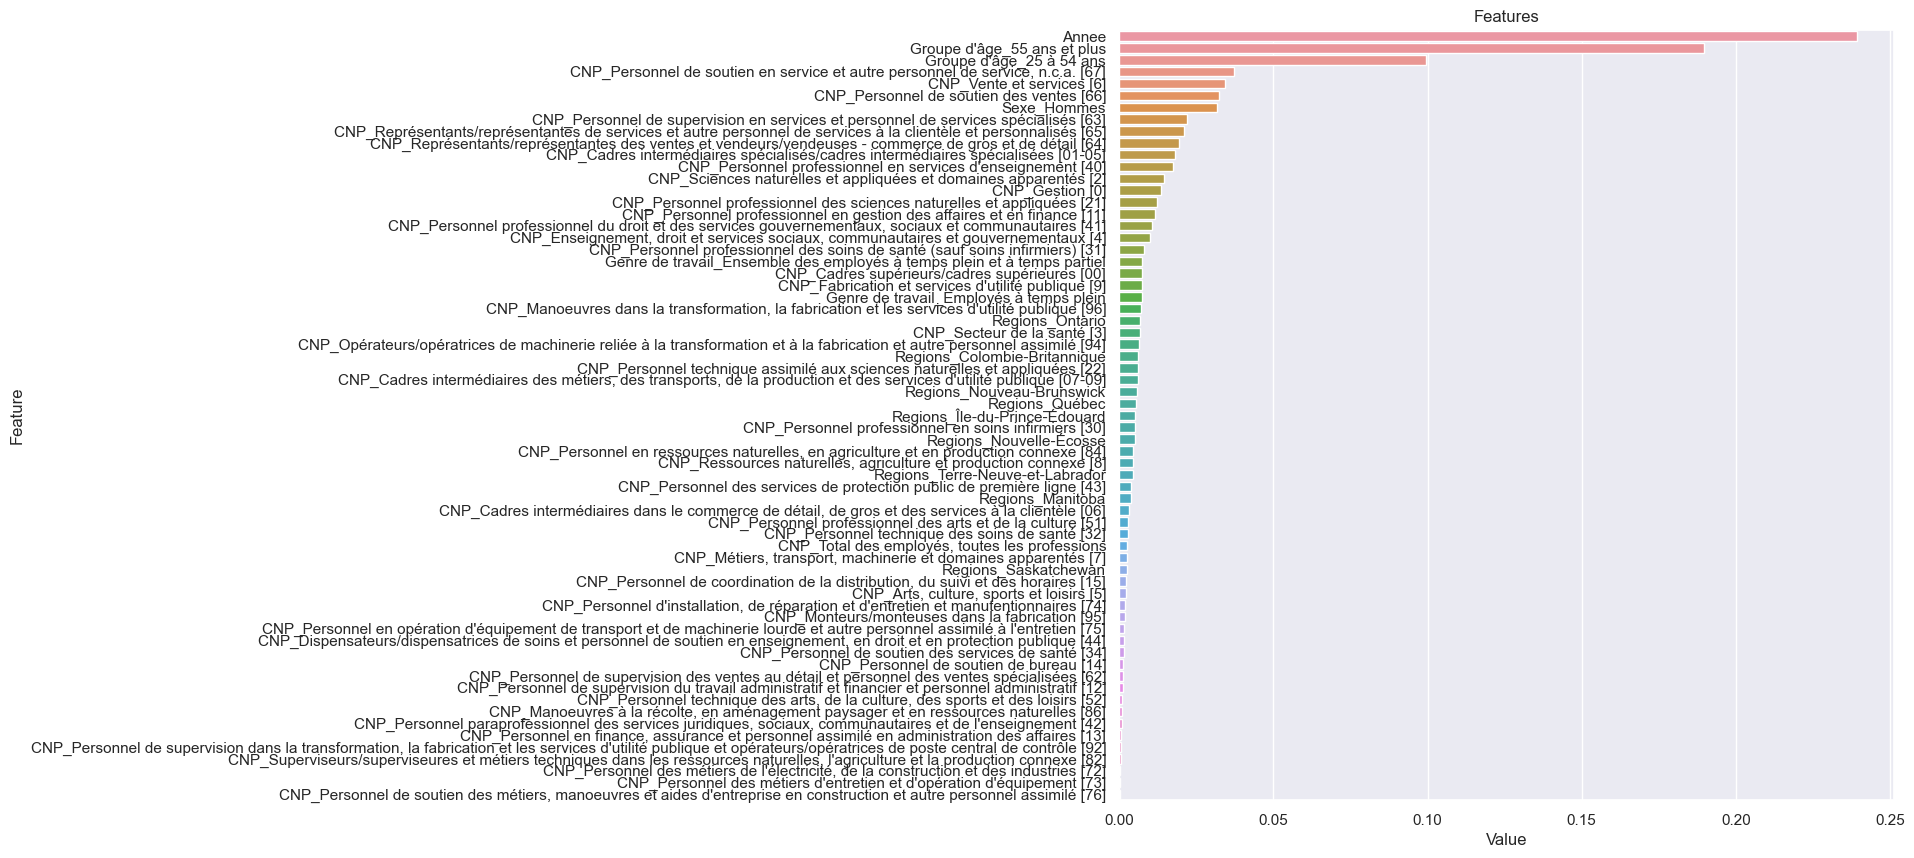

In [94]:
plot_importance(rf_model, x_train)

### Expliquer la prédiction individuelle à l'aide de LimeTabularExplainer

https://coderzcolumn.com/tutorials/machine-learning/how-to-use-lime-to-understand-sklearn-models-predictions#:~:text=The%20lime_tabular%20module%20has%20a%20class%20named%20LimeTabularExplainer,array%29%20that%20were%20used%20to%20train%20the%20model.
 

 

In [199]:
from lime.lime_tabular import LimeTabularExplainer

explainer=LimeTabularExplainer(x_train.to_numpy(),
                              feature_names=x_train.columns,
                              mode='regression')
explainer

In [228]:
import random
idx=random.randint(1,len(x_test))
print("La valeur prédite:",  np.exp2(rf_model.predict(np.array(x_test.iloc[idx]).reshape(-1,70))))
print("La vrais valeur:", np.exp2(y_test_log.iloc[idx]))

exp = explainer.explain_instance(x_test.to_numpy()[idx],rf_model.predict, num_features=x_train.shape[1])
exp.show_in_notebook(show_table=True)

c:\Users\daian\anaconda3\envs\salaire\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



La valeur prédite: [6.37946227]
La vrais valeur: 5.9078737581125536


c:\Users\daian\anaconda3\envs\salaire\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



### Tunning

In [30]:
param_grid = {'C': [0.1, 1,2],
              #'degree' : [2],
              #'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma' : ['auto','scale'],
              'kernel': ['linear','rbf', 'sigmoid']} #,, 'poly' 'rbf', 'sigmoid'
 
#---------train the model------------------------------------------------------
score = make_scorer(mean_squared_error)
grid = GridSearchCV(SVR(), param_grid, 
                        cv = 2,
                        n_jobs= -1,
                       return_train_score=True)
grid.fit(x_train, y_train_log)
print(grid.best_params_)

model=grid.best_estimator_
print(model)
model.fit(x_train,y_train_log)


{'C': 2, 'gamma': 'auto', 'kernel': 'rbf'}
SVR(C=2, gamma='auto')


SVR(C=2, gamma='auto')

MSE: sur donnees de test 0.33
R2 sur donnees de test: 0.94
MSE: sur donnees de training 0.32
R2 sur donnees de training: 0.94
       Salaires prédit  Salaire initial
47528              9.0         8.734714
58622             10.0        10.662269
59260              9.0         9.569749
51881              7.0         7.001159
77762             10.0         9.513570


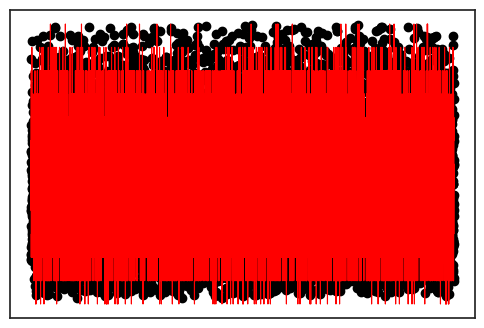

In [56]:

prediction_train=model.predict(x_train)
ypred=model.predict(x_test)

# ------inverse operation de log--------------------------------------------

prediction_train = np.round(np.exp2(prediction_train),0)
y_train    = np.exp2(y_train_log)

ypred  = np.round(np.exp2(ypred),0)
y_test = np.exp2(y_test_log)

#------------------metrics-------------------------------------------------------
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

mse_t = mean_squared_error(prediction_train,y_train)
r2_t = r2_score(y_train, prediction_train)

print("MSE: sur donnees de test %.2f" % mse)
print("R2 sur donnees de test: %.2f" % r2)

print("MSE: sur donnees de training %.2f" % mse_t)
print("R2 sur donnees de training: %.2f" % r2_t)
# -----------------difference valeurs predite et reele---------------------------

data = pd.DataFrame(data={"Salaires prédit": ypred,"Salaire initial":y_test})
print(data.head(5))


x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, color="black",label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")

plt.xticks(())
plt.yticks(())

plt.show()

In [53]:
salaire_employe.loc[58622]

Annee                                                                 2015
Regions                                                            Alberta
CNP                      Personnel des métiers d'entretien et d'opérati...
Sexe                                                                Femmes
Groupe d'âge                                                   25 à 54 ans
Genre de travail                                    Employés à temps plein
Salaire horaire moyen                                                 30.4
Name: 58622, dtype: object

In [49]:
np.log(22.8)

3.126760535960395

In [51]:
np.exp(3.126760535960395)

22.8

In [75]:
X.loc[47528]

Annee                                                            2011
Regions                                       Terre-Neuve-et-Labrador
CNP                 Métiers, transport, machinerie et domaines app...
Sexe                                                           Hommes
Groupe d'âge                                              25 à 54 ans
Genre de travail                               Employés à temps plein
Name: 47528, dtype: object

L'annee est un predicteur 

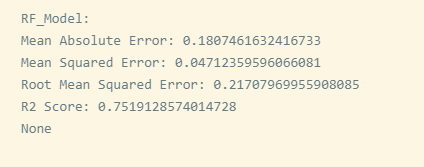

### Deploiement du modele

<li> Pour enregistrer et utiliser ulterieurement un model et un objet de preparation de donnees:

1. Definir le jeu des donnees
2. Codage des variables categorielle

  </li>

In [35]:
X.head()

Annee  Regions                                      CNP    Sexe  \
0   1997  Alberta  Affaires, finance et administration [1]  Femmes   
1   1997  Alberta  Affaires, finance et administration [1]  Femmes   
2   1997  Alberta  Affaires, finance et administration [1]  Femmes   
3   1997  Alberta  Affaires, finance et administration [1]  Femmes   
4   1997  Alberta  Affaires, finance et administration [1]  Femmes   

  Groupe d'âge                                   Genre de travail  
0  15 à 24 ans                           Employés à temps partiel  
1  15 à 24 ans                             Employés à temps plein  
2  15 à 24 ans  Ensemble des employés à temps plein et à temps...  
3  25 à 54 ans                             Employés à temps plein  
4  25 à 54 ans  Ensemble des employés à temps plein et à temps...

In [160]:
X_copy=X.copy()

In [15]:
index = pd.Index(range(0, X.shape[0] ,1))
X=X.set_index(index)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

y_train_=pd.DataFrame(y_train,columns=["Salaire horaire moyen"])
y_test_ =pd.DataFrame(y_test,columns=["Salaire horaire moyen"])



In [17]:
scaler=OneHotEncoder(sparse=False,handle_unknown = 'ignore')
encoder_df = pd.DataFrame(scaler.fit_transform(np.array(X_train[['Regions','CNP','Sexe',"Groupe d'âge",'Genre de travail']]))).set_index(X_train.index)
encoder_df.columns=scaler.get_feature_names_out(['Regions','CNP','Sexe',"Groupe d'âge",'Genre de travail'])
final_df = X_train.join(encoder_df)
final_df.drop(columns=['Regions','CNP','Sexe',"Groupe d'âge",'Genre de travail'], axis=1, inplace=True)

encoder_df_test = pd.DataFrame(scaler.transform(np.array(X_test[['Regions','CNP','Sexe',"Groupe d'âge",'Genre de travail']]))).set_index(X_test.index)
encoder_df_test.columns=scaler.get_feature_names_out(['Regions','CNP','Sexe',"Groupe d'âge",'Genre de travail'])
final_df_test =pd.merge(X_test, encoder_df_test,left_index=True, right_index=True)
final_df_test.drop(columns=['Regions','CNP','Sexe',"Groupe d'âge",'Genre de travail'], axis=1, inplace=True)

In [19]:
print(X_test.shape[0],X_train.shape[0])

16827 67308


In [20]:
print(encoder_df_test.shape[0],encoder_df.shape[0])

16827 67308


In [24]:
x_train=final_df
x_test=final_df_test

y_train_log=np.log(y_train)
y_test_log=np.log(y_test)

rf_model=RandomForestRegressor().fit(x_train,y_train_log)
print("RF_Model:")
print(evaluate_model(rf_model,x_test,y_test_log))

RF_Model:
Mean Absolute Error: 0.04086855986095728
Mean Squared Error: 0.003630209920573188
Root Mean Squared Error: 0.06025122339482567
R2 Score: 0.9808883768764238
None


MSE: sur donnees de test 1.89
R2 sur donnees de test: 0.98
MSE: sur donnees de training 0.33
R2 sur donnees de training: 1.00
       Salaires prédit  Salaire initial
47528             22.0            22.80
58622             29.0            30.40
59260             27.0            26.01
51881             16.0            16.57
77762             26.0            25.79


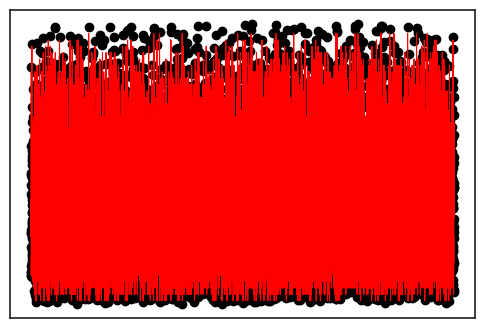

In [52]:

prediction_train=rf_model.predict(x_train)
ypred=rf_model.predict(x_test)

# ------inverse operation de log--------------------------------------------

prediction_train = np.round(np.exp(prediction_train),0)
y_train    = np.exp(y_train_log)

ypred  = np.round(np.exp(ypred),0)
y_test = np.exp(y_test_log)

#------------------metrics-------------------------------------------------------
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

mse_t = mean_squared_error(prediction_train,y_train)
r2_t = r2_score(y_train, prediction_train)

print("MSE: sur donnees de test %.2f" % mse)
print("R2 sur donnees de test: %.2f" % r2)

print("MSE: sur donnees de training %.2f" % mse_t)
print("R2 sur donnees de training: %.2f" % r2_t)
# -----------------difference valeurs predite et reele---------------------------

data = pd.DataFrame(data={"Salaires prédit": ypred,"Salaire initial":y_test})
print(data.head(5))


x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, color="black",label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")

plt.xticks(())
plt.yticks(())

plt.show()

In [55]:
test_input =np.array([[2002],['Alberta'],["Affaires, finance et administration"], ['Femmes'], ['15 a 24 ans'],['Employes a temps partiel']])
X_ = pd.DataFrame(test_input.reshape(1,6), columns=["Annee",'Regions','CNP', 'Sexe', "Groupe d'âge","Genre de travail"])
X_['Annee'] = X_['Annee'].astype(int)
encoder_df = pd.DataFrame(scaler.transform(np.array(X_[['Regions','CNP','Sexe',"Groupe d'âge",'Genre de travail']]))).set_index(X_.index)
encoder_df.columns=scaler.get_feature_names_out(['Regions','CNP','Sexe',"Groupe d'âge",'Genre de travail'])
final_df = X_.join(encoder_df)
final_df.drop(columns=['Regions','CNP','Sexe',"Groupe d'âge",'Genre de travail'], axis=1, inplace=True)
np.exp(rf_model.predict(final_df))

array([16.01918006])

In [56]:
from lime.lime_tabular import LimeTabularExplainer

explainer=LimeTabularExplainer(final_df.to_numpy(),
                              feature_names=final_df.columns,
                              mode='regression')
explainer

In [57]:
from lime.lime_tabular import LimeTabularExplainer

explainer=LimeTabularExplainer(x_train.to_numpy(),
                              feature_names=x_train.columns,
                               verbose=True,
                              mode='regression')
explainer

In [58]:
exp = explainer.explain_instance(final_df.to_numpy()[0],rf_model.predict, num_features=40)#final_df.shape[1])
exp.show_in_notebook(show_table=True)

c:\Users\daian\anaconda3\envs\salaire\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



Intercept 2.7576061277884176
Prediction_local [2.82780063]
Right: 2.7737867580347375


In [59]:
print("Modele prediction:",np.exp(exp.local_pred))
print("La valeur reele:",np.exp(exp.predicted_value))
print("Intecept:",exp.intercept[0])

Modele prediction: [16.90823237]
La valeur reele: 16.01918005962421
Intecept: 2.7576061277884176


In [31]:
pd.DataFrame(exp.as_list(),columns=['Feature','Contribution'])

Feature  Contribution
0                    Groupe d'âge_15 à 24 ans <= 0.00      0.475845
1    CNP_Personnel de soutien des ventes [66] <= 0.00      0.407525
2                                    Annee <= 2003.00     -0.355591
3   CNP_Personnel de soutien en service et autre p...      0.345659
4   CNP_Cadres intermédiaires spécialisés/cadres i...     -0.311064
5   CNP_Personnel professionnel des sciences natur...     -0.302167
6                   CNP_Vente et services [6] <= 0.00      0.280529
7   CNP_Personnel de supervision en services et pe...      0.257694
8   CNP_Sciences naturelles et appliquées et domai...     -0.254903
9                             CNP_Gestion [0] <= 0.00     -0.240453
10  CNP_Personnel professionnel en gestion des aff...     -0.237908
11  CNP_Personnel professionnel en soins infirmier...     -0.237642
12  CNP_Représentants/représentantes de services e...      0.235435
13  CNP_Personnel professionnel en services d'ense...     -0.233308
14  CNP_Représentants/représentantes des ventes et...      0.229903
15  CNP_Cadres supérieurs/cadres supérieures [00] ...     -0.229442
16  CNP_Personnel professionnel des soins de santé...     -0.226800
17  CNP_Personnel professionnel du droit et des se...     -0.169722
18  CNP_Manoeuvres dans la transformation, la fabr...      0.155496
19  Genre de travail_Employés à temps partiel <= 0.00      0.149576
20                CNP_Secteur de la santé [3] <= 0.00     -0.143630
21  CNP_Enseignement, droit et services sociaux, c...     -0.133443
22  CNP_Personnel des services de protection publi...     -0.128769
23  CNP_Cadres intermédiaires des métiers, des tra...     -0.123786
24  CNP_Ressources naturelles, agriculture et prod...      0.120751
25  CNP_Personnel d'installation, de réparation et...      0.118887
26                             Regions_Alberta > 0.00      0.114244
27  CNP_Personnel en ressources naturelles, en agr...      0.110425
28                         0.00 < Sexe_Femmes <= 1.00     -0.104533
29  CNP_Fabrication et services d'utilité publique...      0.102816
30  CNP_Opérateurs/opératrices de machinerie relié...      0.102705
31  CNP_Personnel technique assimilé aux sciences ...     -0.094060
32               Regions_Colombie-Britannique <= 0.00     -0.085493
33  CNP_Personnel de coordination de la distributi...      0.077036
34  CNP_Superviseurs/superviseures et métiers tech...      0.076929
35  CNP_Personnel en opération d'équipement de tra...      0.071207
36                            Regions_Ontario <= 0.00     -0.069353
37  CNP_Personnel technique des soins de santé [32...     -0.065789
38  CNP_Personnel professionnel des arts et de la ...     -0.064549
39                                Sexe_Hommes <= 0.00     -0.056665

In [32]:
import dill as pickle

In [34]:
pickle.dump(rf_model,open("model.pkl",'wb'))
pickle.dump(scaler,open("scaler.pkl",'wb'))
pickle.dump(explainer, open("explainer.pkl",'wb'))

## Annexe

### La régression polynomiale

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(x_poly, y_train_log)

In [107]:
def evalPolynonmialRegression(degree):
    #entrainement du modèle
    polynomial_features= PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(x_train)
    X_test_poly = polynomial_features.fit_transform(x_test)
    model = LinearRegression()
    model.fit(x_train_poly,y_train)
    # Evaluation du training set
 
    y_train_predict = model.predict(x_train_poly)
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2 = r2_score(y_train, y_train_predict)
 
    print('La performance du modèle sur la base dapprentissage')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    print('\n')
 
    # Evaluation du testing set
    y_test_predict = model.predict(x_test_poly)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)
 
    print('La performance du modèle sur la base de test')
    print('--------------------------------------')
    print('Lerreur quadratique moyenne est {}'.format(rmse))
    print('le score R2 est {}'.format(r2))
    return model,r2 ,rmse

In [108]:
evalPolynonmialRegression(4)

MemoryError: Unable to allocate 727. GiB for an array with shape (36500, 2672670) and data type float64

https://medium.com/@goradbj/how-to-build-complete-end-to-end-ml-model-backend-restapi-using-fastapi-and-front-end-ui-using-22f64bf04476

https://dataindependent.com/pandas/pandas-bar-plot-dataframe-plot-bar/#:~:text=Pandas%20Bar%20Plot%20is%20a%20great%20way%20to,Pandas%20will%20draw%20a%20chart%20for%20you%20automatically.

https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html

https://coderzcolumn.com/tutorials/machine-learning/how-to-use-lime-to-understand-sklearn-models-predictions

In [ ]:
#salaire_employe_CNP['key'] = 1
#duree_emploi_CNP['key'] = 1
#result = pd.merge(salaire_employe_CNP, duree_emploi_CNP, on ='key').drop("key", 1)


In [25]:
model=pickle.load(open('model.pkl','rb'))
model.predict(X_encod)

NameError: name 'pickle' is not defined